10. Categorize news headlines into topics. Use a dataset of news headlines from various domains.
i. Implement a text classification model to categorize headlines into topics (e.g., sports, politics, technology).

ii. Discuss potential applications in news aggregation services.

**Objective**

To build a text classification model that can automatically categorize news headlines into predefined topics such as sports, politics, business, technology, entertainment, etc.

**NLP preprocessing techniques**

Feature extraction using TF-IDF

Model building using machine learning

Evaluation of classification performance

**Dataset**

Dataset Name: News Category Dataset Source: Kaggle - News Category Dataset

**Fields:**

headline: the headline text

category: the label/topic (like politics, tech, business, etc.)

In [13]:


# STEP 1: Install and Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [14]:
#  STEP 3: Load the Dataset
df = pd.read_json("/kaggle/input/im-yag/News_Category_Dataset_v3.json", lines=True)
df = df[['headline', 'category']]

# Optional: Display first few rows
df.head()

#  STEP 4: Filter for selected categories (you can change as needed)
categories_to_use = ['POLITICS', 'SPORTS', 'TECH', 'BUSINESS', 'ENTERTAINMENT']
df = df[df['category'].isin(categories_to_use)]

print("Total Records:", df.shape)
print("Category Distribution:")
print(df['category'].value_counts())

# STEP 5: Text Preprocessing
df['headline'] = df['headline'].str.lower()

#  STEP 6: Split Data
X = df['headline']
y = df['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 7: TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


vectorizer_logreg = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_logreg = vectorizer_logreg.fit_transform(X_train)
X_test_logreg = vectorizer_logreg.transform(X_test)

Total Records: (66137, 2)
Category Distribution:
category
POLITICS         35602
ENTERTAINMENT    17362
BUSINESS          5992
SPORTS            5077
TECH              2104
Name: count, dtype: int64


In [15]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

model_logreg = LogisticRegression(max_iter=1000)
model_logreg.fit(X_train_logreg, y_train)


LogisticRegression(max_iter=1000)

In [16]:
y_pred = model.predict(X_test_tfidf)

print("🔹 Accuracy for Multinomial:", accuracy_score(y_test, y_pred))
print("\n🔹 Classification Report for Multinomial:\n", classification_report(y_test, y_pred))


y_pred_logreg = model_logreg.predict(X_test_logreg)

print("🔹 Accuracy for Logistic Regression:", accuracy_score(y_test, y_pred_logreg))
print("\n🔹 Classification Report for Logistic Regression:\n", classification_report(y_test, y_pred_logreg))

🔹 Accuracy for Multinomial: 0.8293014817054732

🔹 Classification Report for Multinomial:
                precision    recall  f1-score   support

     BUSINESS       0.81      0.40      0.53      1226
ENTERTAINMENT       0.85      0.85      0.85      3501
     POLITICS       0.81      0.97      0.88      7076
       SPORTS       0.93      0.57      0.70      1006
         TECH       0.86      0.19      0.31       419

     accuracy                           0.83     13228
    macro avg       0.85      0.59      0.66     13228
 weighted avg       0.83      0.83      0.81     13228

🔹 Accuracy for Logistic Regression: 0.8588599939522226

🔹 Classification Report for Logistic Regression:
                precision    recall  f1-score   support

     BUSINESS       0.76      0.57      0.65      1226
ENTERTAINMENT       0.86      0.87      0.86      3501
     POLITICS       0.87      0.95      0.91      7076
       SPORTS       0.88      0.70      0.78      1006
         TECH       0.80      

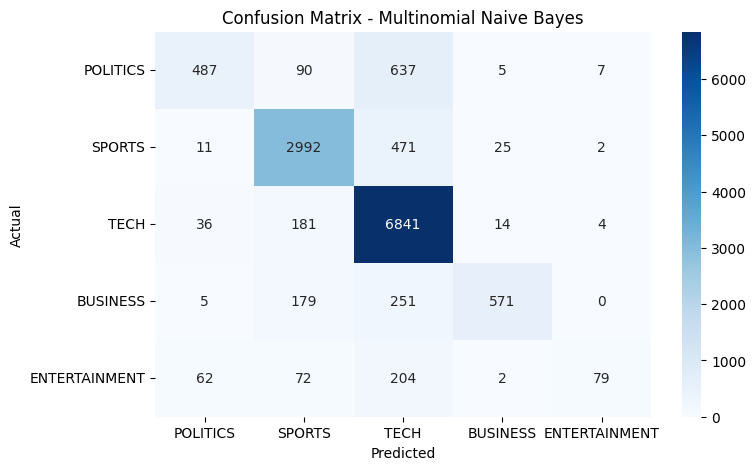

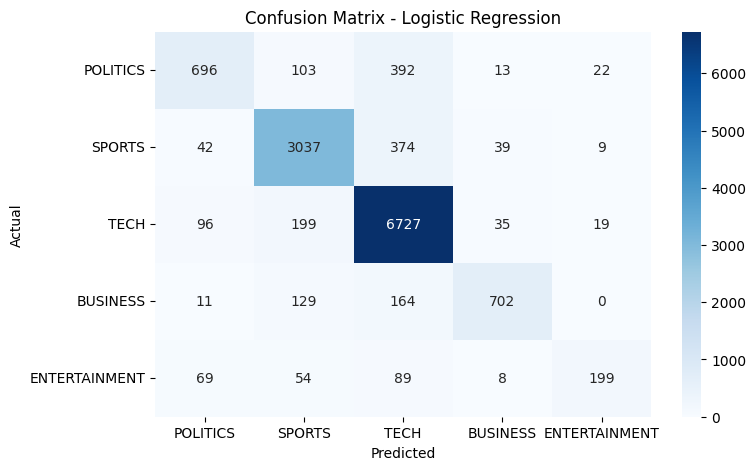

In [17]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=categories_to_use, yticklabels=categories_to_use, cmap='Blues')
plt.title("Confusion Matrix - Multinomial Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


cm_logreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(8, 5))
sns.heatmap(cm_logreg, annot=True, fmt='d', xticklabels=categories_to_use, yticklabels=categories_to_use, cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [19]:
sample_headlines = [
    "PM announces new economic reforms for growth",
    "Cristiano Ronaldo scores a stunning hat-trick",
    "Google launches AI-powered assistant",
    "Oscars 2025: Best actor nominations revealed",
    "Stock markets crash after tech sell-off"
]

sample_tfidf = vectorizer.transform(sample_headlines)
sample_preds = model.predict(sample_tfidf)

for headline, label in zip(sample_headlines, sample_preds):
    print(f"📝 '{headline}' ➡️ Predicted Category: {label}")

print("----------------------------------------------")
# STEP 11: Try Sample Headlines
sample_headlines = [
    "NASA discovers new exoplanet with potential for life",
    "India wins the T20 World Cup in a thrilling final",
    "Microsoft acquires another tech startup to expand AI capabilities",
    "New study reveals the impact of climate change on Arctic ice",
    "Bollywood star announces retirement from acting"
]

sample_logreg = vectorizer_logreg.transform(sample_headlines)
sample_preds_logreg = model_logreg.predict(sample_logreg)

for headline, label in zip(sample_headlines, sample_preds_logreg):
    print(f"📝 '{headline}' ➡️ Predicted Category: {label}")



📝 'PM announces new economic reforms for growth' ➡️ Predicted Category: POLITICS
📝 'Cristiano Ronaldo scores a stunning hat-trick' ➡️ Predicted Category: SPORTS
📝 'Google launches AI-powered assistant' ➡️ Predicted Category: TECH
📝 'Oscars 2025: Best actor nominations revealed' ➡️ Predicted Category: ENTERTAINMENT
📝 'Stock markets crash after tech sell-off' ➡️ Predicted Category: BUSINESS
----------------------------------------------
📝 'NASA discovers new exoplanet with potential for life' ➡️ Predicted Category: POLITICS
📝 'India wins the T20 World Cup in a thrilling final' ➡️ Predicted Category: SPORTS
📝 'Microsoft acquires another tech startup to expand AI capabilities' ➡️ Predicted Category: TECH
📝 'New study reveals the impact of climate change on Arctic ice' ➡️ Predicted Category: POLITICS
📝 'Bollywood star announces retirement from acting' ➡️ Predicted Category: ENTERTAINMENT


In [22]:
# STEP: Predict a single input case
single_headline = input()

# Convert to TF-IDF using the same vectorizer
single_tfidf = vectorizer.transform([single_headline])

# Predict using the trained model
single_prediction = model.predict(single_tfidf)

print(f"📝 '{single_headline}' ➡️ Predicted Category: {single_prediction[0]}")


# Convert to TF-IDF using the same vectorizer
single_logreg = vectorizer_logreg.transform([single_headline])

# Predict using the trained model
single_prediction = model_logreg.predict(single_tfidf)

print(f"📝 '{single_headline}' ➡️ Predicted Category: {single_prediction[0]}")


 elon musk discusses the upgrades that could have been done to the movie Avatar


📝 'elon musk discusses the upgrades that could have been done to the movie Avatar' ➡️ Predicted Category: BUSINESS
📝 'elon musk discusses the upgrades that could have been done to the movie Avatar' ➡️ Predicted Category: ENTERTAINMENT
